In [24]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import os

In [25]:
def process(test):
    fpath = "../test_data/" + test

    head1 = "# hostname;interval;timestamp;CPU;%user;%nice;%system;%iowait;%steal;%idle"
    head2 = "# hostname;interval;timestamp;kbmemfree;kbavail;kbmemused;%memused;kbbuffers;kbcached;kbcommit;%commit;kbactive;kbinact;kbdirty"

    data = None
    with open(fpath+"/" + test + "_h", 'r') as f:
        data = f.read()

    CPU, MEM = data.split(head2)

    MEM = head2+MEM

    c_df = pd.DataFrame([x.split(';') for x in CPU.split('\n')])
    new_header = c_df.iloc[0] #grab the first row for the header
    c_df = c_df[1:-1] #take the data less the header row
    c_df.columns = new_header #set the header row as the df header

    m_df = pd.DataFrame([x.split(';') for x in MEM.split('\n')])
    new_header = m_df.iloc[0] #grab the first row for the header
    m_df = m_df[1:-1] #take the data less the header row
    m_df.columns = new_header #set the header row as the df header

    c_df["%idle"] = pd.to_numeric(c_df["%idle"], downcast="float")
    c_df['usage'] = 100-c_df['%idle']

    m_df["kbmemused"] = pd.to_numeric(m_df["kbmemused"], downcast="float")
    m_df['memused'] = m_df['kbmemused']/(1024*1024)
    
    return c_df, m_df


In [32]:
test = 'test5'

In [33]:
c_df, m_df = process(test)

In [34]:
c_df.usage.mean()

21.473366

<AxesSubplot:>

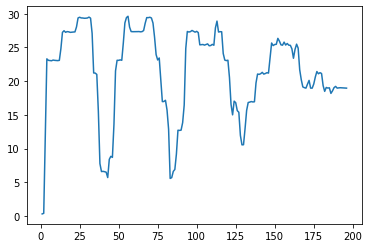

In [35]:
c_df.usage.plot()

In [36]:
m_df.memused.mean()

4.064323580994898

<AxesSubplot:>

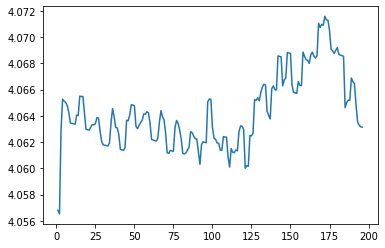

In [37]:
m_df.memused.plot()